In [167]:
import numpy as np
import matplotlib.pyplot as plt 
import importlib
import time
# import animation module here
import matplotlib.animation as animation
from IPython.display import HTML, clear_output as clr
from simple_evolution import load_generations
import agent as Agents
importlib.reload(Agents)
import env as Environments
importlib.reload(Environments)

<module 'env' from 'C:\\Users\\kumarabh\\Downloads\\Work\\Experiments\\Hypotheton\\src\\evolution\\simple_experiment_v01\\env.py'>

In [168]:
def animate_generation(imagelist, play_from = 0, gen_text = '0', figsize = (8, 8)):
    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot(111)
    ims = []
    for i in range(len(imagelist[play_from:])):
        im = ax.imshow(imagelist[play_from+i], animated=True)
        time_text = ax.text(0.02, 0.95, 'Generation = %d' % int(gen_text), transform=ax.transAxes, color='black', fontsize=10)
        ims.append([im, time_text])

    ax.legend()
    ani = animation.ArtistAnimation(fig, ims, interval=5, blit=True, repeat_delay=100)

    # Correct padding between the video and the edge of the video player
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)

    plt.tight_layout()
    plt.close(fig)  # Close the figure to prevent it from being displayed twice

    return HTML(ani.to_jshtml())

In [169]:
dnas, generation_count, image_list = load_generations(suffix = '_a')

In [170]:
# lets find unique number of dnas
unique_dnas = np.unique(np.array(dnas), axis = 0)
print(f"unique counts {unique_dnas.shape[0]}, out of {len(dnas)}")

unique counts 560, out of 839


In [171]:
# Test latest generation
env = Environments.SimpleEvolutionEnv(max_steps_per_generation=200, population=1000, number_hidden_neurons = 3, gene_length = 32)
env.load_agents(dnas, generation_count)

In [175]:
generation_images = []
state_time_lapses = []
action_time_lapses = []

# lets time each step
done = False
max_step = 201
steps = 0
states = env.reset()
while not done and steps < max_step:
    img = env.render()
    start = time.time()
    sample_actions = [env.agents[k].get_outputs(states[k]) for k in range(env.population)]
    # sample_actions = [{key: np.random.rand() for key in output_keys} for k in range(env.population)]
    action_time_lapses.append(time.time() - start)
    start = time.time()
    states, _, done, _ = env.step(sample_actions)
    state_time_lapses.append(time.time() - start)
    start = time.time()
    generation_images.append(img)
    steps += 1

In [176]:
print("Survival Rate:", env.survival_rate)

Survival Rate: 0.818


In [177]:
animate_generation(imagelist=generation_images, play_from=0, gen_text=str(0), figsize = (5,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [123]:
len(image_list), len(image_list[2]), image_list[0][0].shape

(100, 200, (128, 128, 3))

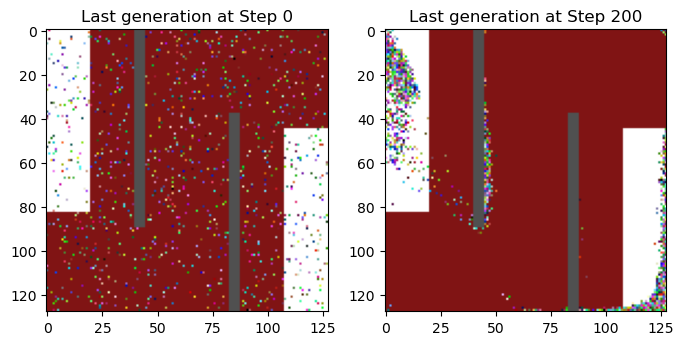

In [178]:
fig, ax = plt.subplots(1,2,figsize = [8, 8])
ax[0].imshow(generation_images[0])
ax[0].set_title("Last generation at Step 0")
ax[1].imshow(generation_images[-1])
ax[1].set_title("Last generation at Step 200")
plt.show()